In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from sklearn.cluster import KMeans
from shapely.geometry.multipolygon import MultiPolygon

In [2]:
df = pd.read_excel(r"C:/Users/admin/Desktop/hug_inn/ddata.xlsx")

In [3]:
k=4
kmean=KMeans(n_clusters=k)
kmean = kmean.fit(df)
y = kmean.fit_predict(df[['Long', 'Lat', 'EC 0-2']])
df['Cluster'] = y
df

,Long,Lat,EC 0-2,Cluster
0,75.439488,31.429853,8.56,3
1,75.439472,31.429853,8.65,3
2,75.439452,31.429852,8.77,3
3,75.439432,31.429852,8.90,0
4,75.439410,31.429852,9.03,0
...,...,...,...,...
146,75.439178,31.429938,9.86,2
147,75.439153,31.429918,10.03,2
148,75.439128,31.429898,10.19,2
149,75.439110,31.429882,10.36,2


In [4]:
df['points']=df[['Long', 'Lat','Cluster']].apply(tuple, axis=1)
points=df['points']

c0 = []
c1 = []
c2 = []
c3 = []

for line in points:
    s = []
    s.append(line[0])
    s.append(line[1])
    if line[2] == 0.0:
        c0.append(s)
    if line[2] == 1.0:
        c1.append(s)
    if line[2] == 2.0:
        c2.append(s)
    if line[2] == 3.0:
        c3.append(s)

hull0 = ConvexHull(c0)
hull1 = ConvexHull(c1)
hull2 = ConvexHull(c2)
hull3 = ConvexHull(c3)

c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)

In [5]:
bp0=[]
bp1=[]
bp2=[]
bp3=[]

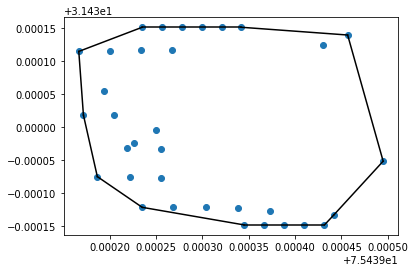

In [6]:
plt.plot(c0[:,0], c0[:,1], 'o')
for simplex in hull0.simplices:
    bp0.append(c0[simplex[0]])
    bp0.append(c0[simplex[1]])
    plt.plot(c0[simplex,0], c0[simplex,1], 'k-') 

plt.show()

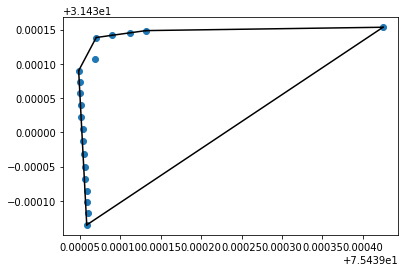

In [7]:
plt.plot(c1[:,0], c1[:,1], 'o')
for simplex in hull1.simplices:
    bp1.append(c1[simplex[0]])
    bp1.append(c1[simplex[1]])
    plt.plot(c1[simplex,0], c1[simplex,1], 'k-') 

plt.show()

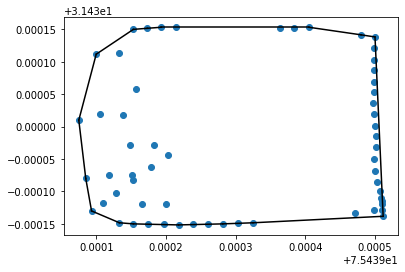

In [8]:
plt.plot(c2[:,0], c2[:,1], 'o')
for simplex in hull2.simplices:
    bp2.append(c2[simplex[0]])
    bp2.append(c2[simplex[1]])
    plt.plot(c2[simplex,0], c2[simplex,1], 'k-') 

plt.show()

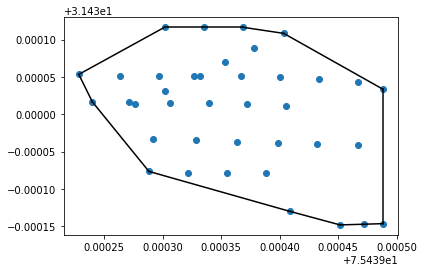

In [9]:
plt.plot(c3[:,0], c3[:,1], 'o')
for simplex in hull3.simplices:
    bp3.append(c3[simplex[0]])
    bp3.append(c3[simplex[1]])
    plt.plot(c3[simplex,0], c3[simplex,1], 'k-') 

plt.show()

In [10]:
crs = {'init': 'epsg:4326'}

poly = gpd.GeoDataFrame( crs=crs,geometry=[ Polygon(bp0),Polygon(bp1),Polygon(bp2),Polygon(bp3) ])       

poly= poly.convex_hull

poly.to_file(filename="polygon.shp", driver="ESRI Shapefile")
